### Installation

In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("chromVAR", version = "3.8")
# BiocManager::install("motifmatchr", version = "3.8")
# BiocManager::install("BSgenome.Hsapiens.UCSC.hg19", version = "3.8")
# BiocManager::install("JASPAR2016", version = "3.8")

### Import packages

In [2]:
library(chromVAR)
library(motifmatchr)
library(Matrix)
library(SummarizedExperiment)
library(BiocParallel)
library('JASPAR2016')
library(BSgenome.Hsapiens.UCSC.hg19)


Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, r

In [3]:
packageVersion("chromVAR")

[1] ‘1.4.1’

In [4]:
register(MulticoreParam(10))

### Obtain Feature Matrix

In [5]:
start_time <- Sys.time()

In [6]:
set.seed(2019)

In [7]:
metadata <- read.table('../../input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

In [8]:
peakfile <- "../../input/combined.sorted.merged.bed"
peaks <- getPeaks(peakfile, sort_peaks = TRUE)

Warning message in getPeaks(peakfile, sort_peaks = TRUE):
“Peaks are not equal width!Use resize(peaks, width = x, fix = "center") to make peaks equal in size, where x is the desired size of the peaks)”Peaks sorted


`width=500` will cause the error: Error in loadFUN(x, seqname, ranges): trying to load regions beyond the boundaries of non-circular sequence "chr17"

In [9]:
peaks <- resize(peaks, width = 450, fix = "center")

In [10]:
bamfile <- list.files(path = "../../input/sc-bams_nodup/", pattern = "\\.bam$")

In [11]:
length(bamfile)

[1] 2034

In [12]:
cellnames <- sapply(strsplit(bamfile,'.',fixed = TRUE), "[[", 1)

In [13]:
head(cellnames)

[1] "BM1077-CLP-Frozen-160106-13" "BM1077-CLP-Frozen-160106-14"
[3] "BM1077-CLP-Frozen-160106-2"  "BM1077-CLP-Frozen-160106-21"
[5] "BM1077-CLP-Frozen-160106-27" "BM1077-CLP-Frozen-160106-3"

In [14]:
sum(cellnames == rownames(metadata))

[1] 2034

In [15]:
fragment_counts <- getCounts(paste0("../../input/sc-bams_nodup/",bamfile), 
                             peaks, 
                             paired =  TRUE, 
                             by_rg = TRUE, 
                             format = "bam", 
                             colData = data.frame(celltype = cellnames))

Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-13.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-27.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-3.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-36.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-44.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-61.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-62.dedup.s

Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-91.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-1.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-10.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-20.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-22.dedup.

Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-53.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-54.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-55.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-56.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-57.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-58.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-59.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-6.dedup.s

Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-72.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160

Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-41.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-45.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-46.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-51.dedup.

Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-96.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-1.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-13.dedup.st.bam
Reading in 

Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-22.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-23.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-24.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-25.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-26.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-27.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-3.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-34.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-52.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-54.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-59.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-6.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-60.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-61.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-62.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-85.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-15.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-19.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-20.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-22.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-23.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-25.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-26.dedup.st.bam
Reading in file: ../../input/sc

Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-30.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-33.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-34.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-35.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-36.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-39.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-

Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-52.dedup.st.bam
Reading in file: ../../input/sc

Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-85.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-SIM-160219-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-10.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-12.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-13.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-17.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-18.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-19.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-62.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-64.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-65.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-67.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-68.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-7.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-8.ded

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-90.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-91.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-96.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-12.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-13.dedup.st.bam
Reading i

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-30.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-33.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-34.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-35.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-37.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-38.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-39.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-40.dedup.st.bam


Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-69.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-70.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-72.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-84.d

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-80.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-1

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-41.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-44.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-50.ded

Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-62.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-63.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-64.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-65.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-66.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-67.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-68.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-69.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-7.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-70.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-1604

Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-88.de

Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-90.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-96.dedup.st.bam


In [16]:
fragment_counts

class: RangedSummarizedExperiment 
dim: 237450 2034 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(2034): BM1077-CLP-Frozen-160106-13 BM1077-CLP-Frozen-160106-14
  ... singles-PB1022-mono-160128-95 singles-PB1022-mono-160128-96
colData names(2): celltype depth

In [17]:
fragment_counts <- addGCBias(fragment_counts, genome = BSgenome.Hsapiens.UCSC.hg19)

In [18]:
head(rowData(fragment_counts))

DataFrame with 6 rows and 1 column
               bias
          <numeric>
1 0.666666666666667
2 0.582222222222222
3 0.542222222222222
4 0.475555555555556
5 0.404444444444444
6 0.462222222222222

In [19]:
counts_filtered <- filterPeaks(fragment_counts, non_overlapping = TRUE)

In [20]:
bg <- getBackgroundPeaks(counts_filtered)
# Potentially save the bg object
saveRDS(bg, file = "background_peaks_motifs.rds")

In [21]:
motifs <- getJasparMotifs()

In [22]:
motifs

PFMatrixList of length 386
names(386): MA0025.1_NFIL3 MA0030.1_FOXF2 ... MA0909.1_HOXD13 MA0914.1_ISL2

In [23]:
motif_ix <- matchMotifs(motifs, counts_filtered, genome = BSgenome.Hsapiens.UCSC.hg19)

In [24]:
dev <- computeDeviations(object = counts_filtered, annotations = motif_ix,
                         background_peaks = bg)

In [25]:
end_time <- Sys.time()
end_time - start_time

Time difference of 16.85996 mins

In [26]:
df_zscores = dev@assays[[1]]

In [49]:
dim(df_zscores)
df_zscores[1:5,1:5]

[1]  386 2034

,BM1077-CLP-Frozen-160106-13,BM1077-CLP-Frozen-160106-14,BM1077-CLP-Frozen-160106-2,BM1077-CLP-Frozen-160106-21,BM1077-CLP-Frozen-160106-27
MA0025.1_NFIL3,-0.085921884,0.16900247,-0.14005670,-0.14202087,-0.28849191
MA0030.1_FOXF2,0.099281717,-0.03352408,0.33010561,-0.17726091,0.04528287
MA0031.1_FOXD1,0.069898310,0.30417186,-0.14838862,0.51438627,0.11138288
MA0051.1_IRF2,0.106044801,0.05510860,0.03469247,0.01098735,0.09564551
MA0056.1_MZF1,-0.007295082,0.02411503,0.07488128,0.11336027,0.02792424


In [50]:
sum(colnames(df_zscores) == rownames(metadata))

[1] 2034

In [27]:
saveRDS(df_zscores, file = '../../output/feature_matrices/FM_ChromVAR_buenrostro2018_motifs.rds')

### Downstream Analysis

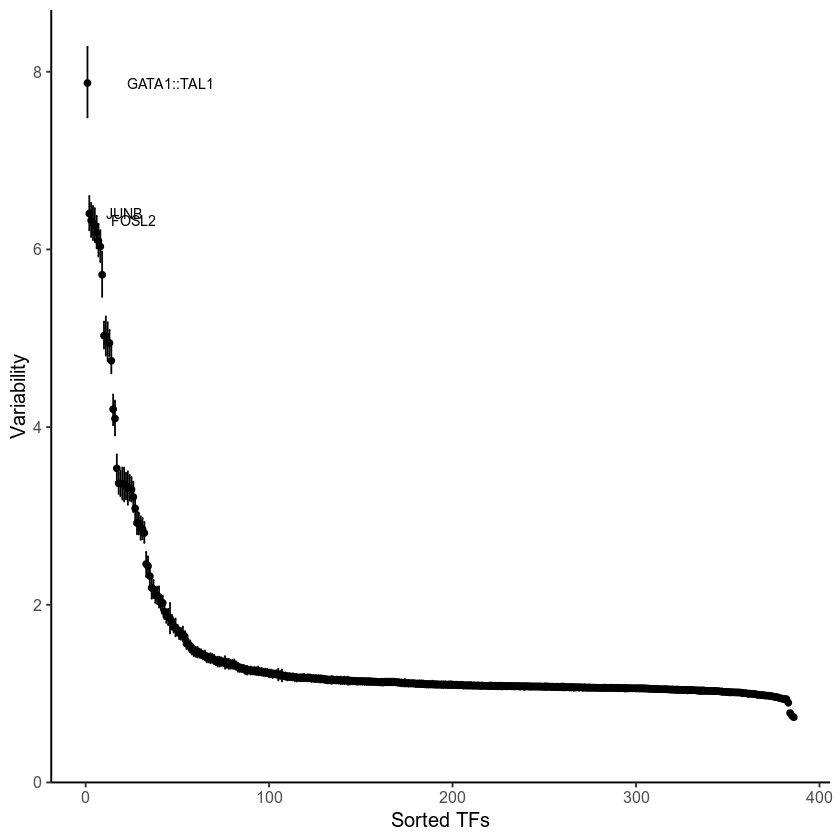

In [28]:
variability <- computeVariability(dev)
plotVariability(variability, use_plotly = FALSE)

In [29]:
head(variability)
dim(variability)

,name,variability,bootstrap_lower_bound,bootstrap_upper_bound,p_value,p_value_adj
MA0025.1_NFIL3,NFIL3,1.470880,1.414369,1.524734,1.206711e-175,7.763172e-175
MA0030.1_FOXF2,FOXF2,1.200890,1.164721,1.237587,7.812800e-36,2.792353e-35
MA0031.1_FOXD1,FOXD1,1.138512,1.102104,1.175352,2.450491e-18,6.348252e-18
MA0051.1_IRF2,IRF2,2.434458,2.333839,2.543889,0.000000e+00,0.000000e+00
MA0056.1_MZF1,MZF1,1.144990,1.099567,1.190395,7.042492e-20,1.900980e-19
MA0057.1_MZF1(var.2),MZF1(var.2),1.148512,1.110217,1.183362,9.602576e-21,2.647567e-20


[1] 386   6

In [41]:
dev$celltype <- metadata[colnames(dev),]

In [42]:
tsne_results <- deviationsTsne(dev, threshold = 1.5, perplexity = 10)

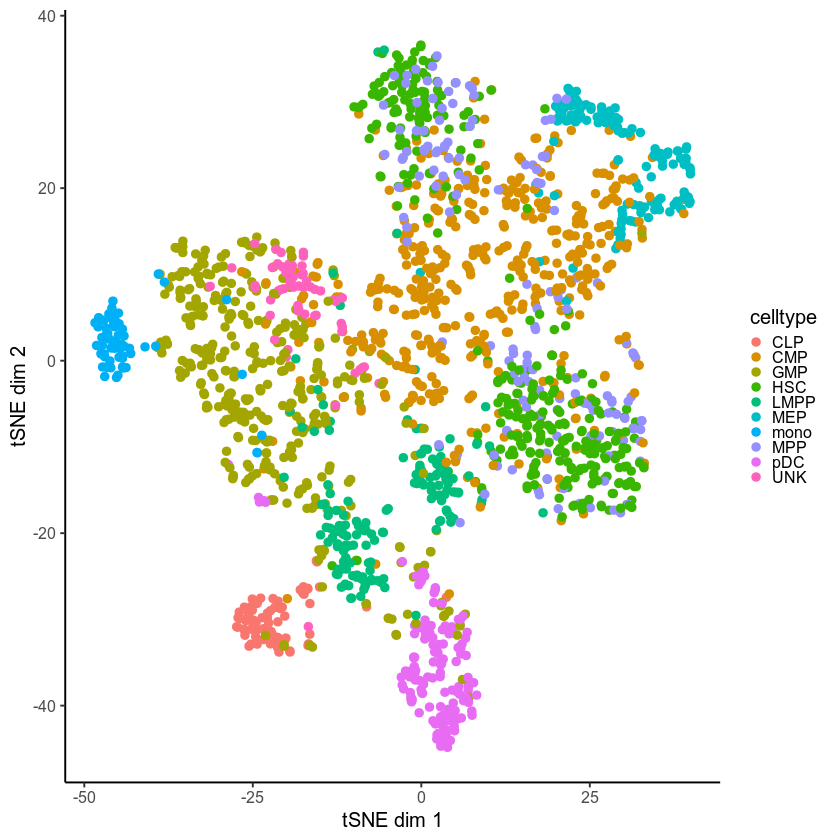

In [43]:
tsne_plots <- plotDeviationsTsne(dev, tsne_results, 
                                 sample_column = "celltype", 
                                 shiny = FALSE)
tsne_plots[[1]]

In [44]:
dim(df_zscores)

[1]  386 2034

In [45]:
df_zscores

,BM1077-CLP-Frozen-160106-13,BM1077-CLP-Frozen-160106-14,BM1077-CLP-Frozen-160106-2,BM1077-CLP-Frozen-160106-21,BM1077-CLP-Frozen-160106-27,BM1077-CLP-Frozen-160106-3,BM1077-CLP-Frozen-160106-36,BM1077-CLP-Frozen-160106-42,BM1077-CLP-Frozen-160106-44,BM1077-CLP-Frozen-160106-50,⋯,singles-PB1022-mono-160128-81,singles-PB1022-mono-160128-82,singles-PB1022-mono-160128-83,singles-PB1022-mono-160128-84,singles-PB1022-mono-160128-85,singles-PB1022-mono-160128-86,singles-PB1022-mono-160128-89,singles-PB1022-mono-160128-90,singles-PB1022-mono-160128-95,singles-PB1022-mono-160128-96
MA0025.1_NFIL3,-0.085921884,0.169002472,-0.1400566962,-0.142020871,-0.288491911,-0.099954391,-0.36993308,-0.064613541,-0.0795789551,0.0615793160,⋯,0.068535843,0.142932023,0.253519409,0.138093137,0.132038994,0.201756879,0.425317678,0.196227664,0.225844242,0.402670675
MA0030.1_FOXF2,0.099281717,-0.033524077,0.3301056133,-0.177260915,0.045282870,0.035805711,0.10520546,0.316308698,-0.0777931883,-0.0047326410,⋯,0.004910172,-0.120884141,-0.058369945,0.073551406,-0.026639867,-0.070588914,-0.152939344,-0.042941581,0.014627359,0.092457724
MA0031.1_FOXD1,0.069898310,0.304171858,-0.1483886175,0.514386271,0.111382875,0.106657626,0.05997235,0.128905047,0.2195836715,-0.1678308761,⋯,0.048853493,-0.028120836,-0.047539475,-0.130944037,-0.064070249,0.032521012,0.109091890,0.064926806,0.119632546,0.067773274
MA0051.1_IRF2,0.106044801,0.055108599,0.0346924665,0.010987349,0.095645506,-0.001484963,-0.10302750,-0.092933376,-0.0929207232,0.1840858187,⋯,-0.017046664,-0.099512665,0.100668848,0.091664971,0.132736980,0.051422856,-0.131083909,0.051360864,0.069902742,0.125667014
MA0056.1_MZF1,-0.007295082,0.024115030,0.0748812765,0.113360269,0.027924238,0.048947203,-0.04452756,-0.021143332,0.0810617003,0.0081992776,⋯,0.034576506,0.023355380,0.012236756,0.039318761,-0.006243502,0.019060705,0.058923348,-0.008404016,-0.009215039,0.030539687
MA0057.1_MZF1(var.2),-0.014263870,-0.047193465,-0.0710997545,0.052248386,-0.002474140,0.196538758,-0.01136468,0.061647249,0.0435026141,-0.1389321775,⋯,-0.011452446,-0.025559063,0.038593233,-0.013048895,-0.004701345,-0.017401619,0.109776613,-0.019030736,-0.003046828,0.009147098
MA0059.1_MAX::MYC,0.111416479,0.251604802,-0.2253329815,-0.099158402,0.078514099,-0.104330143,0.12543149,0.207786752,-0.0719194546,0.1043298440,⋯,-0.031217601,0.023137146,0.037451796,-0.036559257,-0.051734769,0.027827164,0.156366977,-0.004446750,-0.094380046,0.158946478
MA0066.1_PPARG,0.073772263,0.006668860,0.2213819904,-0.160979315,-0.279170639,0.034067141,-0.27448434,-0.109548411,-0.0978631096,0.2318235770,⋯,0.142139404,-0.130449520,-0.019325057,-0.147002262,0.017382917,0.043818260,0.143267248,0.035578015,0.132932322,0.098835146
MA0069.1_Pax6,0.691538355,-0.095442945,-0.0043330772,0.331780979,0.028688017,0.109737922,0.15107510,0.577342604,0.2573537583,0.0711194121,⋯,-0.023811709,0.001144382,0.009776776,0.129867030,-0.004818798,-0.026957080,0.099565322,-0.092993397,0.239524026,0.084285426
MA0070.1_PBX1,0.007302469,0.166256053,0.0148478711,-0.034633308,0.005205355,0.185314356,0.21357472,-0.206270064,0.1544856620,0.0391368310,⋯,-0.332575060,-0.027133631,-0.040050490,-0.290464777,-0.093760585,-0.078888051,-0.371575831,-0.132559495,-0.178116248,0.003383755


In [46]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_chromVAR/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] BSgenome.Hsapiens.UCSC.hg19_1.4.0 BSgenome_1.50.0                  
 [3] rtracklayer_1.42.2                Biostrings_2.50.2                
 [5] XVector_0.22.0                    JASPAR2016_1.10.0                
 [7] SummarizedExperiment_1.12.0 

In [51]:
save.image(file = 'ChromVAR_buenrostro2018_motifs.RData')